In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.rc('axes', axisbelow=True)

from utils.visualization import plot_median_errorbars, get_colors

In [2]:
## BEiT models (bias: ?, weight tying: ?)
with open('../_data/fig-symmetry-vision-models/full-models/BEiT-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-vision-models/BEit.pkl', 'rb') as file:
    params = pickle.load(file)

BEiT_par = [params[key][0] for key in list(params.keys())]
BEiT_score = [models[key][-1].flatten() for key in list(models.keys())]

## DeiT models (bias: ?, weight tying: ?)
with open('../_data/fig-symmetry-vision-models/full-models/DeiT-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-vision-models/Deit.pkl', 'rb') as file:
    params = pickle.load(file)

DeiT_par = [params[key][0] for key in list(params.keys())]
DeiT_score = [models[key][-1].flatten() for key in list(models.keys())]

## DINO models (bias: ?, weight tying: ?)
with open('../_data/fig-symmetry-vision-models/full-models/DINO-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-vision-models/DINO.pkl', 'rb') as file:
    params = pickle.load(file)

DINO_par = [params[key][0] for key in list(params.keys())]
DINO_score = [models[key][-1].flatten() for key in list(models.keys())]

## DIT models (bias: ?, weight tying: ?)
with open('../_data/fig-symmetry-vision-models/full-models/DIT-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-vision-models/DIT.pkl', 'rb') as file:
    params = pickle.load(file)

DIT_par = [params[key][0] for key in list(params.keys())]
DIT_score = [models[key][-1].flatten() for key in list(models.keys())]

## GIT (images) models (bias: ?, weight tying: ?)
with open('../_data/fig-symmetry-vision-models/full-models/GIT-images-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-vision-models/GIT.pkl', 'rb') as file:
    params = pickle.load(file)

GIT_images_par = [params[key][0] for key in list(params.keys())]
GIT_images_score = [models[key][-1].flatten() for key in list(models.keys())]

'------------------------------------------'

## GIT (text) models (bias: ?, weight tying: ?)
with open('../_data/fig-symmetry-vision-models/full-models/GIT-text-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-vision-models/GIT.pkl', 'rb') as file:
    params = pickle.load(file)

GIT_text_par = [params[key][0] for key in list(params.keys())]
GIT_text_score = [models[key][-1].flatten() for key in list(models.keys())]

## iG{T} (text) models (bias: ?, weight tying: ?)
with open('../_data/fig-symmetry-vision-models/full-models/iGPT-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-vision-models/iGPT.pkl', 'rb') as file:
    params = pickle.load(file)

iGPT_par = [params[key][0] for key in list(params.keys())]
iGPT_score = [models[key][-1].flatten() for key in list(models.keys())]

In [3]:
c_encoder = get_colors('navy', n = 12)
c_decoder = get_colors('purple', n = 12)

/Users/matteosaponati/Desktop/repos/attention-geometry/utils/visualization.py:77: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(parameters[k], median, yerr = [[q1_range], [q2_range]],


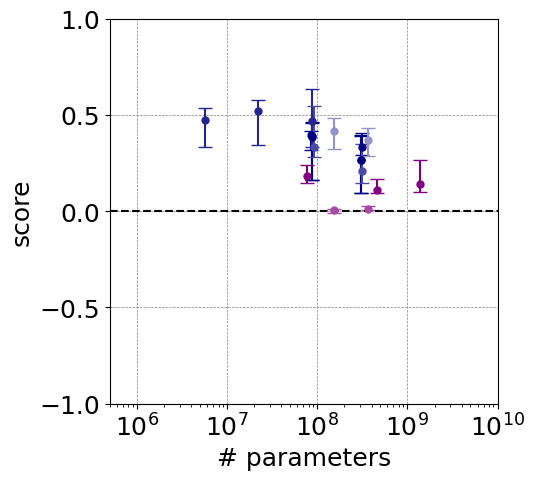

In [4]:
plt.figure(figsize=(5,5))

plot_median_errorbars(BEiT_par, BEiT_score, color = c_encoder[0])
plot_median_errorbars(DeiT_par, DeiT_score, color = c_encoder[2])
plot_median_errorbars(DIT_par, DIT_score, color = c_encoder[4])
# plot_median_errorbars(DINO_par, DINO_score, color = c_encoder[6])
plot_median_errorbars(GIT_images_par, GIT_images_score, color = c_encoder[8])

plot_median_errorbars(iGPT_par, iGPT_score, color = c_decoder[0])
plot_median_errorbars(GIT_text_par, GIT_text_score, color = c_decoder[4])

plt.axhline(y=0.,linestyle='dashed',color='k')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xscale('log')
plt.ylim(-1,1)
plt.ylabel('score')
plt.xlabel('# parameters')
plt.xlim(5e5,1e10)

plt.savefig('../figures/fig1-vision-models.pdf', format='pdf', dpi=300)